<a href="https://colab.research.google.com/github/RahulRaha07/CAPSTONE-EDA1/blob/main/Airbnb_Bookings_Analysis_capstone_Rahul_Raha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data=pd.read_csv('/content/Airbnb NYC 2019.csv')
data.head(10)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:

## Drop longititude,latitude & last_review
data.drop(['latitude','longitude','last_review'],inplace=True,axis=1)


In [ ]:
#checking the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               38843 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

In [ ]:
data.isnull().sum()
##remove null/NA data
df=data.dropna()
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,Entire home/apt,200,3,74,0.59,1,129


**NOW THE DATA IS CLEANED**

**1. Number of Hosts as per Locations**

In [ ]:
df.host= df.groupby('neighbourhood_group',as_index=False)['host_id'].count().sort_values(['host_id'], ascending=False)
df_host=df.host.rename(columns={'neighbourhood_group':'Location','host_id':'host'})



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [ ]:
df_host

,Location,host
2,Manhattan,16621
1,Brooklyn,16439
3,Queens,4572
0,Bronx,875
4,Staten Island,314


Text(0.5, 1.0, 'No of hosts as per location')

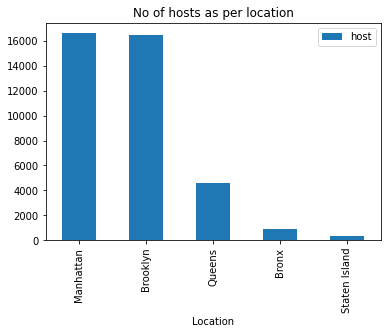

In [ ]:
df_host.plot(kind='bar',x='Location',y='host')
plt.title('No of hosts as per location')

so, manhattan has the hight number of host listed on airbnb followed by Brooklyn.
Numbers significantly decrese for Queens then Bronx and least Staten Island

##Now will compare price as per neighbourhood

In [ ]:
price_df = df.groupby(['neighbourhood_group', 'room_type'], as_index=False)[['price']].mean().sort_values(['price'],ascending=False)
price_df.head()
#sns.barplot(data=mean_price_df, x='neighbourhood_group', y ='price', hue='room_type', ax=ax[0])

,neighbourhood_group,room_type,price
6,Manhattan,Entire home/apt,230.200964
3,Brooklyn,Entire home/apt,171.281897
9,Queens,Entire home/apt,139.225603
12,Staten Island,Entire home/apt,125.366667
0,Bronx,Entire home/apt,120.938312


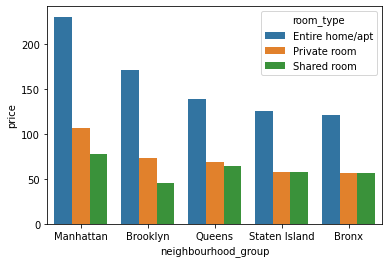

In [ ]:
sns.barplot(data=price_df, x='neighbourhood_group', y ='price', hue='room_type')

IT SHOWS THAT MANHATTAN HAS THE COSTLIEST ROOMS FOLLOWED BY BROOKLYN ORTHER LOCATIONS RELATIVELY CHEAPER AS THEY ARE MORE SUB-URBAN AREA 


#Most Popular/demanded hosts

In [ ]:
#Get the host based on number of reviews
review_df = df.groupby(['host_id','host_name','neighbourhood_group'],as_index=False)['number_of_reviews'].sum().sort_values(['number_of_reviews'],ascending = False)
review_df

,host_id,host_name,neighbourhood_group,number_of_reviews
17489,37312959,Maya,Queens,2273
947,344035,Brooklyn& Breakfast -Len-,Brooklyn,2205
15402,26432133,Danielle,Queens,2017
17155,35524316,Yasu & Akiko,Manhattan,1971
17976,40176101,Brady,Brooklyn,1818
...,...,...,...,...
15164,25376759,Theis,Queens,1
15167,25394253,Pete,Manhattan,1
26688,170413197,Rebecca,Brooklyn,1
15185,25475028,Mark,Manhattan,1


In [ ]:
#Get the host based on availability in a year
availability_df = df.groupby(['host_id','host_name','neighbourhood_group'],as_index=False)['availability_365'].mean().sort_values(['availability_365'],ascending = True)
availability_df

,host_id,host_name,neighbourhood_group,availability_365
0,2438,Tasos,Brooklyn,0.0
14230,22583075,Jonathan,Manhattan,0.0
14232,22588056,Amy,Brooklyn,0.0
14233,22591516,Laura,Queens,0.0
14235,22591930,Matthew,Brooklyn,0.0
...,...,...,...,...
20778,60501531,John,Bronx,365.0
27641,201824419,Angie,Brooklyn,365.0
2344,1313306,Yvette,Manhattan,365.0
19343,48573590,Sherrilyn,Brooklyn,365.0


In [ ]:
#merge two dataframe based on number of reviews and availability in a year
popularhost_df = pd.merge(review_df,availability_df,on = ['host_id','host_name','neighbourhood_group']).sort_values(['availability_365','number_of_reviews'],ascending = [True,False]).rename(columns = {'number_of_reviews':'Number of reviews','availability_365':'Availability in a year','neighbourhood_group':'location'})

popularhost_df

,host_id,host_name,location,Number of reviews,Availability in a year
12,22959695,Gurpreet Singh,Queens,1157,0.0
40,99392252,Michael,Brooklyn,732,0.0
46,121391142,Deloris,Queens,693,0.0
122,792159,Wanda,Brooklyn,480,0.0
123,37818581,Sofia,Manhattan,479,0.0
...,...,...,...,...,...
30056,24423571,Ronny,Queens,1,365.0
30112,22541573,Ken,Brooklyn,1,365.0
30179,26490270,The 6o2,Brooklyn,1,365.0
30235,26133955,William,Manhattan,1,365.0


TOP 5 HOSTS ARE

In [ ]:
popularhost_df.head()

,host_id,host_name,location,Number of reviews,Availability in a year
12,22959695,Gurpreet Singh,Queens,1157,0.0
40,99392252,Michael,Brooklyn,732,0.0
46,121391142,Deloris,Queens,693,0.0
122,792159,Wanda,Brooklyn,480,0.0
123,37818581,Sofia,Manhattan,479,0.0


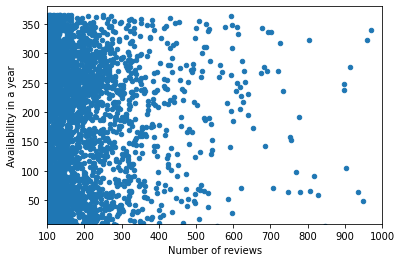

In [ ]:
popularhost_df.plot.scatter(x='Number of reviews', y='Availability in a year', xlim=(100,1000),ylim=(10,380));

##MOST POPULAR ROOM TYPE

In [ ]:
room_type = df.room_type.unique()

In [ ]:
room_type

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
# Which is the most listed room type?
roomtype_list = dict(df.room_type.value_counts())

In [ ]:
roomtype_list

{'Entire home/apt': 20321, 'Private room': 17654, 'Shared room': 846}

Text(0.5, 1.0, 'Room Type Counts')

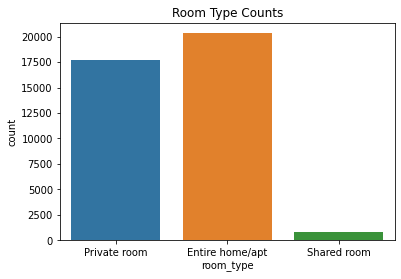

In [ ]:
sns.countplot(data=df, x='room_type').set_title('Room Type Counts')

 ## Availability of rooms

[Text(0, 0, 'Brooklyn'),
 Text(0, 0, 'Manhattan'),
 Text(0, 0, 'Queens'),
 Text(0, 0, 'Staten Island'),
 Text(0, 0, 'Bronx')]

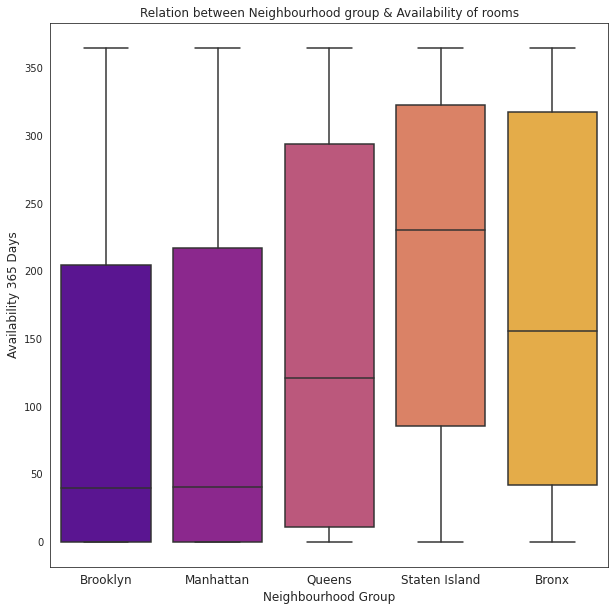

In [ ]:
plt.figure(figsize=(10,10))
sns.set_style('white')

ax = sns.boxplot(data=df, x='neighbourhood_group',y='availability_365',palette='plasma')

# Naming the Chart
ax.set_title('Relation between Neighbourhood group & Availability of rooms').set_fontsize('12')

# Naming X & Y axis
ax.set_ylabel('Availability 365 Days').set_fontsize('12')
ax.set_xlabel('Neighbourhood Group').set_fontsize('12')

#Adjusting Bar labels
ax.set_xticklabels(ax.get_xticklabels(), size = '12')

##Average room price and Proportion of room type in NYC

Text(0.5, 1.0, 'Proportion of Room Types')

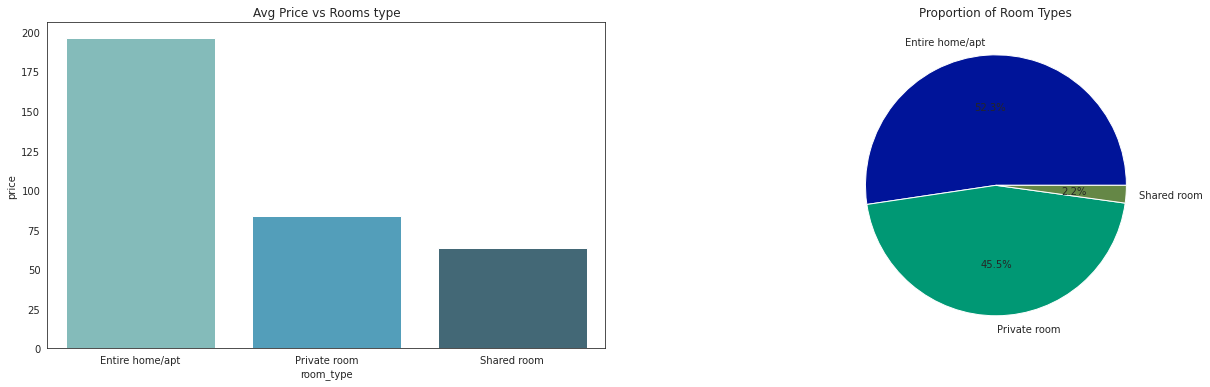

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 6))
ax = axes.flatten()

mean_price_df = df.groupby('room_type', as_index=False)[['price']].mean()
sns.barplot(data=mean_price_df, x='room_type', y='price', palette='GnBu_d', ax=ax[0])
ax[0].set_title("Avg Price vs Rooms type");

labels = df['room_type'].value_counts().index
sizes = df['room_type'].value_counts().values
ax[1].pie(sizes, labels=labels, autopct='%1.1f%%', colors = ['#001499','#009874','#658746'])
ax[1].set_title('Proportion of Room Types')

So, as Entire appt/home shares proportion (52.3%) and it is the costlest among the others

### Popular Night stay location

In [ ]:
  #find the maximum(minimum nights) spending by customer across different neighourhood group
total_nights=df.groupby('neighbourhood_group')['minimum_nights'].sum().reset_index().sort_values('minimum_nights',ascending=True)
total_nights 


,neighbourhood_group,minimum_nights
4,Staten Island,1074
0,Bronx,3441
3,Queens,19305
1,Brooklyn,87458
2,Manhattan,116571


Text(0.5, 0, 'neighbourhood group')

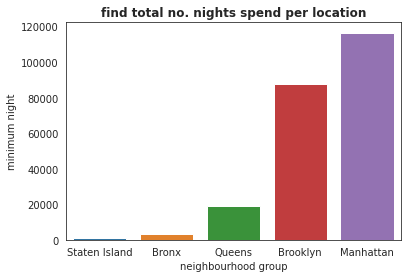

In [ ]:
popular_night= sns.barplot(data = total_nights,x='neighbourhood_group',y='minimum_nights')
popular_night.set_title('find total no. nights spend per location', Weight='bold')
popular_night.set_ylabel('minimum night')
popular_night.set_xlabel('neighbourhood group')


###CONCLUTIONS:

1. Manhattan has highest number of hosts followed by Brooklyn and other three location has less host as they are located at sub urban area.
2. Manhattan have the costlest rooms followed by Brooklyn and other locations have significatly low cost rooms
3. Gurpreet Singh of Queens found out to be best host,rooms are always booked and found to be better reviewed
4. Popular room type in NYC is Enitre appartment/home with 52.3% listed followed by private room and least is shared rooms
5.  Enitre appt/home are costliest room types
6. Avalibility of rooms is little less in Brooklyn and Mahatten whereas other location rooms can be found at time of the year.
7. People preffer Manhattan for Night stay as it has better nightlife and safe.
